# Reporte práctica 2

Para esta práctica se probaron distintos experimentos con la finalidad de encontrar errores en el paquete desarrollado en la [práctica 1](https://github.com/optimizacion-2-2021-1-gh-classroom/practica-1-segunda-parte-diramtz) para así poder hacer una reimplementación del paquete y hacerlo más robusto. Los cambios de nuestro paquete y sus correspondientes tests fueron realizados en el repositorio de la parte dos de la práctica 1.

En este reporte se presentan algunos de los ejemplos auxiliares utilizados para encontrar los distintos errores o posible mejoras de nuestro paquete así como su respectiva ejecución una vez realizadas las reimplementaciones.

* [Primero: Ejemplo base](#primero)
* [Segundo: Ejemplo adicional](#segundo)
* [Tercero: Ejemplo adicional](#tercero)
* [Cuarto: Ejemplo adicional](#cuarto)
* [Quinto: Escalas de valores](#quinto)
* [Sexto: Dos nodos orígen](#sexto)
* [Séptimo: Dos nodos destino](#septimo)
* [Octavo: Nodo origen = Nodo destino](#octavo)
* [Noveno: Bucle](#noveno)
* [Décimo: Nodo origen sin conectar](#decimo)
* [Décimo primero: Nodo destino sin conectar](#decimo-primero)

In [2]:
import ffmaxflow as ff
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

In [8]:
import kale

## Experimentos:

### Primero: Ejemplo base <a name="primero"></a>

En la práctica 1 utilizamos un ejemplo como base para construir nuestro paquete y verificar que los cálculos fueran correctos. Es importante que con cada reimplementación, resolvamos este ejemplo nuevamente para verificar que nuestro paquete continúe resolviéndolo correctamente.

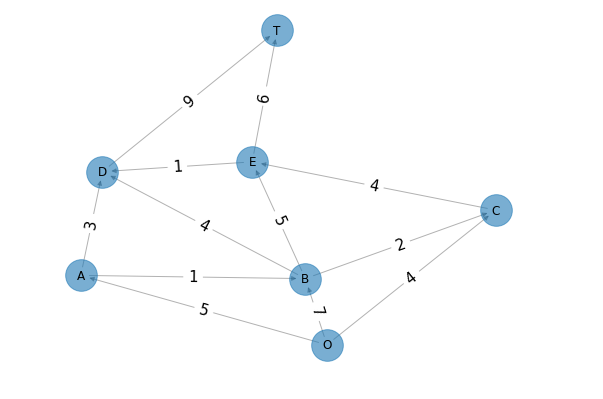

In [3]:
Image(filename='img.png')

In [4]:
red = ff.create_flow_network()

In [5]:
red.create_vertex('o', True, False) # Nodo origen
red.create_vertex('t', False, True) # Nodo destino
red.create_vertex('a', False, False)# Nodos intermedios
red.create_vertex('b', False, False)
red.create_vertex('c', False, False)
red.create_vertex('d', False, False)
red.create_vertex('e', False, False)

In [6]:
red.create_edge('o', 'a', 5)
red.create_edge('o', 'b', 7)
red.create_edge('o', 'c', 4)

red.create_edge('a', 'b', 1)
red.create_edge('a', 'd', 3)

red.create_edge('b', 'c', 2)
red.create_edge('b', 'd', 4)
red.create_edge('b', 'e', 5)

red.create_edge('c', 'e', 4)

red.create_edge('d', 't', 9)

red.create_edge('e', 'd', 1)
red.create_edge('e', 't', 6)

In [7]:
red.MaxFlow()

14

### Segundo: Ejemplo adicional <a name="segundo"></a>
No es suficiente con probar sólo el ejemplo base, pues como mencionamos antes ese ejemplo es nuestro ejemplo de prueba y puede ser el caso que el código se haya acomodado a resolver esa configuración en específico. Por eso es importante, en cada reimplementación intentar más ejemplos aleatorios que nuestro código nunca haya visto antes y verificar que también los resuelva correctamente, esto también es una medida de robustez.

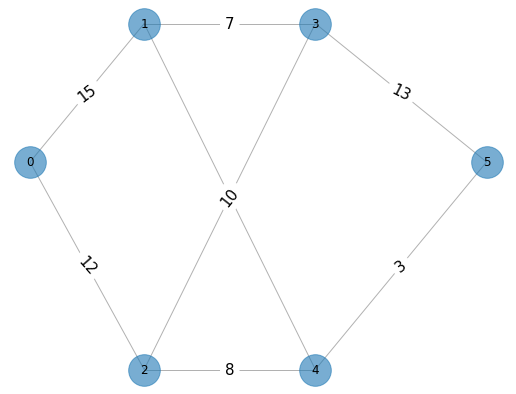

In [26]:
nodes_pos_ex_2 = [[0.09090909090909091, 0.5454545454545454],
                  [0.2727272727272727, 0.7272727272727273],
                  [0.2727272727272727, 0.2727272727272727],
                  [0.5454545454545454, 0.7272727272727273],
                  [0.5454545454545454, 0.2727272727272727],
                  [0.8181818181818182, 0.5454545454545454]]
nodes = range(len(nodes_pos_ex_2))
G_ex_2 = nx.Graph() 
G_ex_2.add_nodes_from(nodes)
edge_labels = {(0,1): 15,
               (0,2): 12,
               (1,3): 7,
               (1,4): 4,
               (2,3): 10,
               (2,4): 8,
               (3,5): 13,
               (4,5): 3
              }    
G_ex_2.add_edges_from(edge_labels)
for e in G_ex_2.edges():
    try:
        G_ex_2[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_2[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos=nodes_pos_ex_2, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos=nodes_pos_ex_2, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos=nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos=nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        


In [29]:
red_2 = ff.create_flow_network()

In [30]:
red_2.create_vertex('0', True, False) # Nodo origen
red_2.create_vertex('5', False, True) # Nodo destino
red_2.create_vertex('1', False, False)# Nodos intermedios
red_2.create_vertex('2', False, False)
red_2.create_vertex('3', False, False)
red_2.create_vertex('4', False, False)

In [31]:
red_2.create_edge('0', '1', 15)
red_2.create_edge('0', '2', 12)

red_2.create_edge('1', '3', 7)
red_2.create_edge('1', '4', 4)

red_2.create_edge('2', '3', 10)
red_2.create_edge('2', '4', 8)


red_2.create_edge('3', '5', 13)

red_2.create_edge('4', '5', 3)

In [32]:
red_2.MaxFlow()

16

### Tercero: Ejemplo adicional <a name="tercero"></a>
Otro ejemplo adicional con una nueva configuración para asegurarnos de que nuestro paquete es robusto.

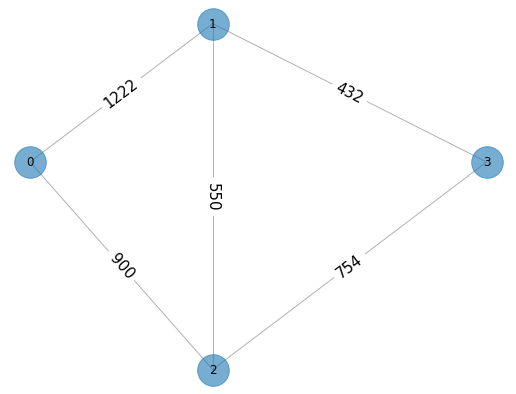

In [37]:
nodes_pos_ex_2 = [[0.09090909090909091, 0.5454545454545454],
                  [0.2727272727272727, 0.7272727272727273],
                  [0.2727272727272727, 0.2727272727272727],
                  [0.5454545454545454, 0.54545454]]
nodes = range(len(nodes_pos_ex_2))
G_ex_2 = nx.Graph() 
G_ex_2.add_nodes_from(nodes)
edge_labels = {(0,1): 1222,
               (0,2): 900,
               (1,2): 550,
               (1,3): 432,
               (2,3): 754
              }    
G_ex_2.add_edges_from(edge_labels)
for e in G_ex_2.edges():
    try:
        G_ex_2[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_2[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos=nodes_pos_ex_2, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos=nodes_pos_ex_2, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos=nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos=nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        


In [38]:
red_3 = ff.create_flow_network()

In [39]:
red_3.create_vertex('0', True, False) # Nodo origen
red_3.create_vertex('3', False, True) # Nodo destino
red_3.create_vertex('1', False, False)# Nodos intermedios
red_3.create_vertex('2', False, False)

In [40]:
red_3.create_edge('0', '1', 1222)
red_3.create_edge('0', '2', 900)

red_3.create_edge('1', '2', 550)
red_3.create_edge('1', '3', 432)

red_3.create_edge('2', '3', 754)

In [41]:
red_3.MaxFlow()

1186

### Cuarto: Ejemplo adicional <a name="cuarto"></a>

Otro ejemplo adicional con configuración nueva para verificar la robustez y versatilidad del paquete.

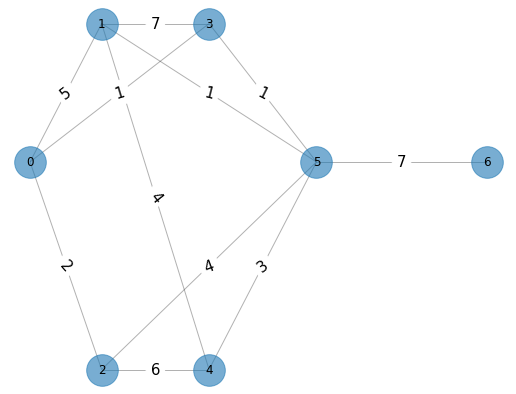

In [15]:
nodes_pos_ex_2 = [[0.09090909090909091, 0.5454545454545454],
                  [0.2727272727272727, 0.7272727272727273],
                  [0.2727272727272727, 0.2727272727272727],
                  [0.5454545454545454, 0.7272727272727273],
                  [0.5454545454545454, 0.2727272727272727],
                  [0.8181818181818182, 0.5454545454545454],
                  [1.25, 0.5454545454545454]]
nodes = range(len(nodes_pos_ex_2))
G_ex_2 = nx.Graph() 
G_ex_2.add_nodes_from(nodes)
edge_labels = {(0,1): 5,
               (0,2): 2,
               (0,3): 1,
               (1,3): 7,
               (1,4): 4,
               (1,5): 1,
               (2,4): 6,
               (2,5): 4,
               (3,5): 1,
               (4,5): 3,
               (5,6): 7
              }    
G_ex_2.add_edges_from(edge_labels)
for e in G_ex_2.edges():
    try:
        G_ex_2[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_2[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos=nodes_pos_ex_2, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos=nodes_pos_ex_2, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos=nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos=nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

In [16]:
red_1 = ff.create_flow_network()

In [18]:
red_1.create_vertex('0', True, False) # Nodo origen
red_1.create_vertex('6', False, True) # Nodo destino
red_1.create_vertex('1', False, False)# Nodos intermedios
red_1.create_vertex('2', False, False)
red_1.create_vertex('3', False, False)
red_1.create_vertex('4', False, False)
red_1.create_vertex('5', False, False)

In [20]:
red_1.create_edge('0', '1', 5)
red_1.create_edge('0', '2', 2)
red_1.create_edge('0', '3', 1)

red_1.create_edge('1', '3', 7)
red_1.create_edge('1', '4', 4)
red_1.create_edge('1', '5', 1)


red_1.create_edge('2', '4', 6)
red_1.create_edge('2', '5', 4)

red_1.create_edge('3', '5', 1)

red_1.create_edge('4', '5', 3)

red_1.create_edge('5', '6', 7)

In [21]:
red_1.MaxFlow()

7

### Quinto: Escalas de valores <a name="quinto"></a>

Otra manera en la que podemos ver qué tan robusto es nuestro paquete es viendo como se comporta con configuraciones con capacidades de flujo muy grandes o muy pequeños. De esta manera podemos encontrar problemas numéricos y mejorarlos. En nuestro caso, probando distintos valores de flujo, no encontramos ningún problema es este sentido en nuestro paquete.

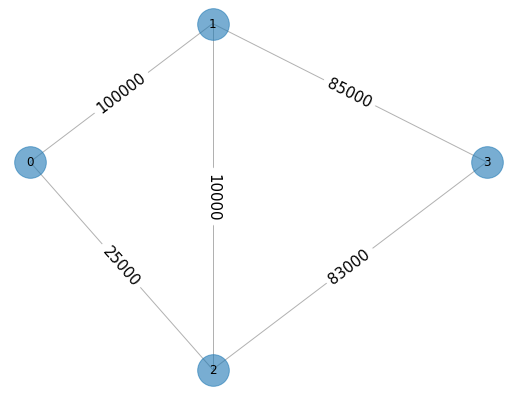

In [5]:
nodes_pos_ex_2 = [[0.09090909090909091, 0.5454545454545454],
                  [0.2727272727272727, 0.7272727272727273],
                  [0.2727272727272727, 0.2727272727272727],
                  [0.5454545454545454, 0.54545454]]
nodes = range(len(nodes_pos_ex_2))
G_ex_2 = nx.Graph() 
G_ex_2.add_nodes_from(nodes)
edge_labels = {(0,1): 100000,
               (0,2): 25000,
               (1,2): 10000,
               (1,3): 85000,
               (2,3): 83000
              }    
G_ex_2.add_edges_from(edge_labels)
for e in G_ex_2.edges():
    try:
        G_ex_2[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_2[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos=nodes_pos_ex_2, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos=nodes_pos_ex_2, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos=nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos=nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()    

In [4]:
red_5 = ff.create_flow_network()

In [6]:
red_5.create_vertex('0', True, False) # Nodo origen
red_5.create_vertex('3', False, True) # Nodo destino
red_5.create_vertex('1', False, False)# Nodos intermedios
red_5.create_vertex('2', False, False)

In [7]:
red_5.create_edge('0', '1', 100000)
red_5.create_edge('0', '2', 25000)

red_5.create_edge('1', '2', 10000)
red_5.create_edge('1', '3', 85000)

red_5.create_edge('2', '3', 83000)

In [8]:
red_5.MaxFlow()

120000

### Sexto: Dos nodos origen <a name="sexto"></a>
Ahora, se toman en cuenta posibles problemas específicos de redes. Como por ejemplo, que el cálculo del flujo máximo en una red es imposible si dicha red tiene más de un nodo orígen. En estos casos, en vez de lanzar un error, el paquete realiza el cálculo tomando el primer nodo orígen que se definió e ignorando los posteriores. Además, arroja un mensaje que indica cual fue el problema en el cálculo del flujo máximo para que así, el usuario pueda saber cuál fue su error y corregirlo fácilmente.

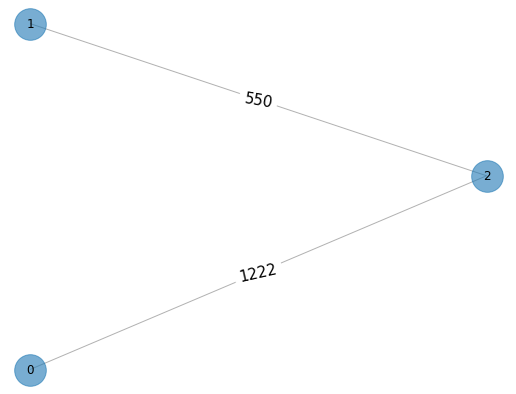

In [4]:
nodes_pos_ex_2 = [[0.09090909090909091, 0.2727272727272727],
                  [0.09090909090909091, 0.727272727272727],
                  [0.9444, 0.5272727272727273]]
nodes = range(len(nodes_pos_ex_2))
G_ex_2 = nx.Graph() 
G_ex_2.add_nodes_from(nodes)
edge_labels = {(0,2): 1222,
               (1,2): 550
              }    
G_ex_2.add_edges_from(edge_labels)
for e in G_ex_2.edges():
    try:
        G_ex_2[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_2[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos=nodes_pos_ex_2, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos=nodes_pos_ex_2, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos=nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos=nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()       

In [3]:
red_6 = ff.create_flow_network()

In [4]:
red_6.create_vertex('0', True, False) # Nodo origen
red_6.create_vertex('1', True, False) # Nodo Origen
red_6.create_vertex('2', False, True)  # Nodo destino 

In [5]:
red_6.create_edge('0', '2', 1222)

red_6.create_edge('1', '2', 550)


Nodo origen ya ha sido agregado. 
 El cálculo de flujo máximo continúa con el primer valor asignado al nodo orígen.


In [6]:
red_6.MaxFlow()

1222

### Séptimo: Dos nodos destino <a name="septimo"></a>
Similarmente al ejemplo anterior, el cálculo del flujo máximo puede realizarse si se tienen dos o más nodos destino. En este caso, el paquete también realiza el cálculo con el primer nodo destino definido e imprime un mensaje con el error en el diseño de la red para su posterior corrección por el usuario.

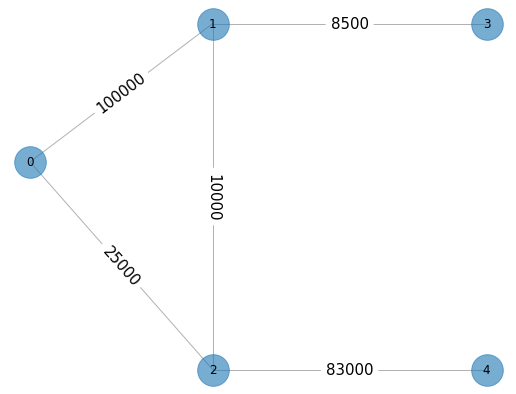

In [7]:
nodes_pos_ex_2 = [[0.09090909090909091, 0.5454545454545454],
                  [0.2727272727272727, 0.7272727272727273],
                  [0.2727272727272727, 0.2727272727272727],
                  [0.5454545454545454, 0.7272727272727273],
                  [0.5454545454545454, 0.272727272727273]
                 ]
nodes = range(len(nodes_pos_ex_2))
G_ex_2 = nx.Graph() 
G_ex_2.add_nodes_from(nodes)
edge_labels = {(0,1): 100000,
               (0,2): 25000,
               (1,2): 10000,
               (1,3): 8500,
               (2,4): 83000
              }    
G_ex_2.add_edges_from(edge_labels)
for e in G_ex_2.edges():
    try:
        G_ex_2[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_2[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos=nodes_pos_ex_2, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos=nodes_pos_ex_2, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos=nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos=nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()   

In [8]:
red_7 = ff.create_flow_network()

In [9]:
red_7.create_vertex('0', True, False) # Nodo origen
red_7.create_vertex('3', False, True) # Nodo Destino
red_7.create_vertex('4', False, True) # Nodo Destino
red_7.create_vertex('1', False, False)# Nodos intermedios
red_7.create_vertex('2', False, False)

In [10]:
red_7.create_edge('0', '1', 100000)
red_7.create_edge('0', '2', 25000)

red_7.create_edge('1', '2', 10000)
red_7.create_edge('1', '3', 8500)

red_7.create_edge('2', '4', 83000)

Nodo destino ya ha sido agregado. 
 El cálculo del flujo máximo continúa con el primer valor asignado al nodo destino.


In [11]:
red_7.MaxFlow()

8500

### Octavo: Nodo Origen = Nodo destino <a name="octavo"></a>
En casos donde el nodo origen es el mismo que el nodo destino, el cálculo del flujo máximo no tiene sentido. Por lo que aquí, no se realiza el cálculo y en su lugar se arroja un mensaje con el correspondiente error. Además, de otros posibles errores que hayan surgido en el diseño de la red por el usuario, probando que nuestro paquete puede combinar mensajes para distintos errores haciéndo más fácil su manipulación.

In [12]:
red_8 = ff.create_flow_network()

In [13]:
red_8.create_vertex('0', True, False) # Nodo origen
red_8.create_vertex('0', False, True) # Nodo Destino
red_8.create_vertex('1', False, False)# Nodos intermedios
red_8.create_vertex('2', False, False)
red_8.create_vertex('4', False, False)

In [14]:
red_8.create_edge('0', '1', 100000)
red_8.create_edge('0', '2', 25000)

red_8.create_edge('1', '2', 10000)
red_8.create_edge('1', '3', 8500)

red_8.create_edge('2', '4', 83000)

Nodo destino ya ha sido agregado. 
 El cálculo del flujo máximo continúa con el primer valor asignado al nodo destino.


In [15]:
red_8.MaxFlow()

'La red no tiene nodo origen y/o destino '

### Noveno: Bucle <a name="noveno"></a>
Otro caso no permitido es cuando un arco es un bucle que sale y entra al mismo nodo. En realidad esto no es un problema si simplemente ignoramos este arco pues no afecta la estructura general de la red. Por esto, cuando se define un bucle el paquete arroja un mensaje de advertencia indicando que realizará el cálculo sin tomar en cuenta este arco.

In [16]:
red_9 = ff.create_flow_network()

In [17]:
red_9.create_vertex('0', True, False) # Nodo origen
red_9.create_vertex('3', False, True) # Nodo Destino
red_9.create_vertex('1', False, False)# Nodos intermedios
red_9.create_vertex('2', False, False)

In [18]:
red_9.create_edge('0', '1', 100000)
red_9.create_edge('0', '2', 25000)

red_9.create_edge('1', '2', 10000)
red_9.create_edge('1', '1', 500)

red_9.create_edge('2', '3', 8500)

No se pueden tener bucles. 
 El cálculo de flujo máximo continuará sin tomar en cuenta este arco.


In [19]:
red_9.MaxFlow()

8500

### Décimo: Nodo origen sin conectar  <a name="decimo"></a>
Para el caso en el que el nodo orígen no se conecta al resto de la red, el flujo neto es cero siempre. Por lo que realiza el cálculo sin imprimir ningún mensaje.

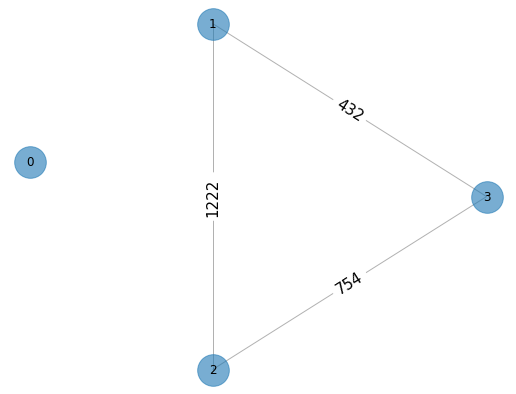

In [32]:
nodes_pos_ex_11 = [[0.09090909090909091, 0.5454545454545454],
                  [0.2727272727272727, 0.7272727272727273],
                  [0.2727272727272727, 0.2727272727272727],
                  [0.5454545454545454, 0.5]
                 ]
nodes = range(len(nodes_pos_ex_11))
G_ex_11 = nx.Graph() 
G_ex_11.add_nodes_from(nodes)
edge_labels = {(1,2): 550,
               (3,2): 900,
               (2,1): 1222,
               (1,3): 432,
               (2,3): 754
              }    
G_ex_11.add_edges_from(edge_labels)
for e in G_ex_11.edges():
    try:
        G_ex_11[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_11[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_11, pos=nodes_pos_ex_11, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_11, pos=nodes_pos_ex_11, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_11, pos=nodes_pos_ex_11)
nx.draw_networkx_nodes(G_ex_11, pos=nodes_pos_ex_11, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()

In [20]:
red_10 = ff.create_flow_network()

In [21]:
red_10.create_vertex('0', True, False) # Nodo origen
red_10.create_vertex('3', False, True) # Nodo destino
red_10.create_vertex('1', False, False)# Nodos intermedios
red_10.create_vertex('2', False, False)

In [22]:
red_10.create_edge('2', '1', 1222)
red_10.create_edge('3', '2', 900)

red_10.create_edge('1', '2', 550)
red_10.create_edge('1', '3', 432)

red_10.create_edge('2', '3', 754)

In [23]:
red_10.MaxFlow()

0

### Décimo primero: Nodo destino sin conectar  <a name="decimo-primero"></a>
Similarmente al ejemplo anterior, cuando el nodo destino no está conectado al resto de la red, el flujo también es siempre cero.

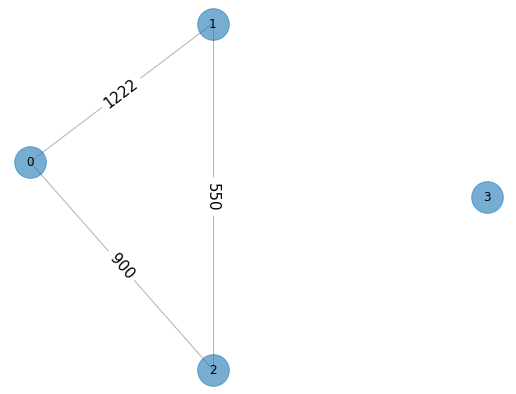

In [31]:
nodes_pos_ex_11 = [[0.09090909090909091, 0.5454545454545454],
                  [0.2727272727272727, 0.7272727272727273],
                  [0.2727272727272727, 0.2727272727272727],
                  [0.5454545454545454, 0.5]
                 ]
nodes = range(len(nodes_pos_ex_11))
G_ex_11 = nx.Graph() 
G_ex_11.add_nodes_from(nodes)
edge_labels = {(0,1): 1222,
               (0,2): 900,
               (1,2): 550
              }    
G_ex_11.add_edges_from(edge_labels)
for e in G_ex_11.edges():
    try:
        G_ex_11[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_11[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_11, pos=nodes_pos_ex_11, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_11, pos=nodes_pos_ex_11, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_11, pos=nodes_pos_ex_11)
nx.draw_networkx_nodes(G_ex_11, pos=nodes_pos_ex_11, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

In [24]:
red_11 = ff.create_flow_network()

In [25]:
red_11.create_vertex('0', True, False) # Nodo origen
red_11.create_vertex('3', False, True) # Nodo destino
red_11.create_vertex('1', False, False)# Nodos intermedios
red_11.create_vertex('2', False, False)

In [26]:
red_11.create_edge('0', '1', 1222)
red_11.create_edge('0', '2', 900)

red_11.create_edge('1', '2', 550)

In [27]:
red_11.MaxFlow()

0